## Procesamiento Digital de señales TP 7: Remuestreo

In [1]:
from skimage import data, io, filters
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from scipy import misc
from skimage.util.dtype import dtype_range
import seaborn as sns
import matplotlib.image as mpimg

# Importamos las imagenes a utilizar

In [2]:
pwd

'/home/human/Dropbox/doctorado/chapter00_courses/procesamiento_digital_imagenes'

In [3]:
img1 = rgb2gray(io.imread('/home/human/Dropbox/doctorado/chapter00_courses/procesamiento_digital_imagenes/planetario.jpg'))
img2 = rgb2gray(io.imread('/home/human/Dropbox/doctorado/chapter00_courses/procesamiento_digital_imagenes/totem.jpg'))

In [4]:
img1.shape[1]/2

2080.0

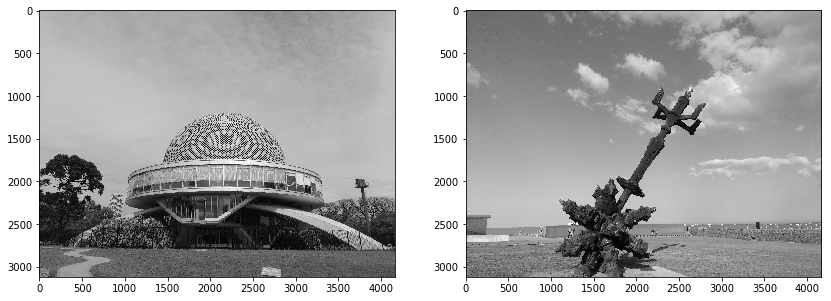

In [5]:
f, axarr = plt.subplots(1,2)
f.set_size_inches(14, 8)
axarr[0].imshow(img1, cmap=plt.cm.gray)
axarr[1].imshow(img2, cmap=plt.cm.gray)
axarr[0].grid(False)
axarr[1].grid(False)
plt.show()

# Downsampling

In [6]:
def bicubic_in(x):
    return (np.absolute(x)**3 - 2*x**2 + 1)

def bicubic_out(x):
    return (-np.absolute(x)**3 + 5*x**2 - 8*np.absolute(x) + 4)

In [7]:
def downsampling(img, kernel, tipo, size):
    
    img_filt = np.zeros((int(img.shape[0]/2),int(img.shape[1]/2)))
    margenk = kernel.shape[0]
            
    if tipo == "uniforme":
        
        for i in range(0, np.shape(img_filt)[0]):
            for j in range(0, np.shape(img_filt)[1]):

                img_filt[i,j] = img[i*margenk, j*margenk]

    elif tipo == "bilineal":
        
        for i in range(0, np.shape(img_filt)[0]):
            for j in range(0, np.shape(img_filt)[1]):
                img_filt[i,j] = np.mean(img[(i*margenk):(i*margenk)+margenk, (j*margenk):(j*margenk)+margenk])  
                
    return img_filt

In [8]:
img1_downsamp_uni = downsampling(img1, np.ones((2,2)), "uniforme", 2)
img2_downsamp_uni = downsampling(img2, np.ones((2,2)), "uniforme", 2)

In [9]:
img1_downsamp_bilin = downsampling(img1, np.ones((2,2)), "bilineal", 2)
img2_downsamp_bilin = downsampling(img2, np.ones((2,2)), "bilineal", 2)

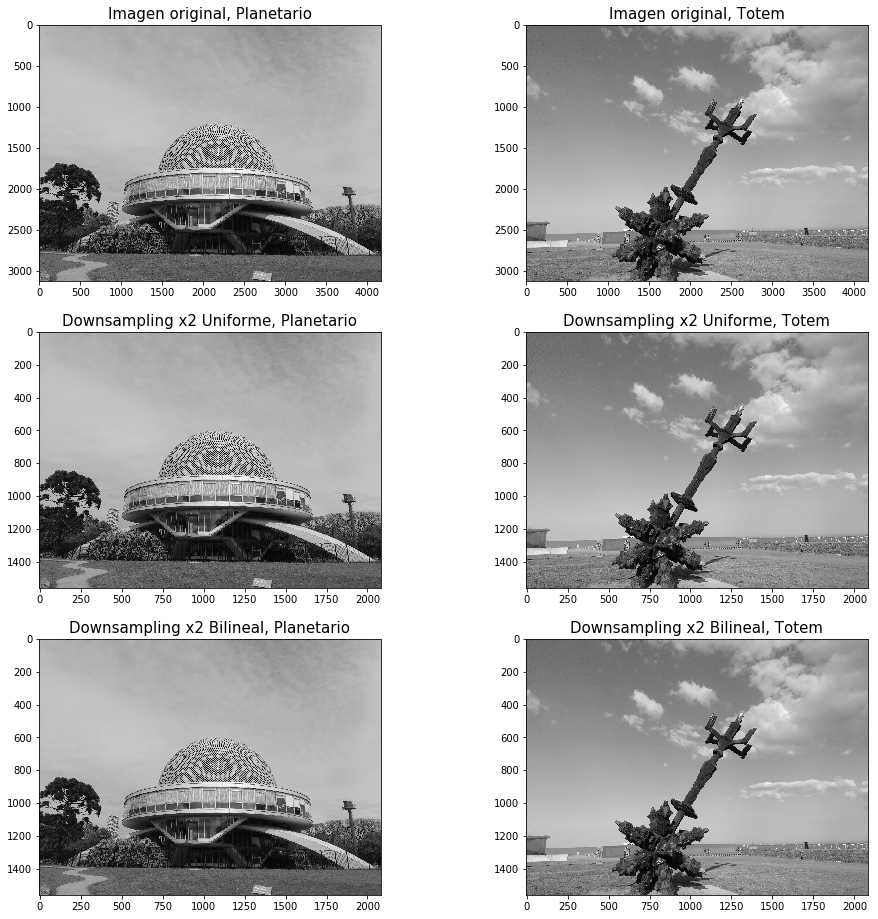

In [10]:
f, axarr = plt.subplots(3,2)
f.set_size_inches(16, 16)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img2, cmap=plt.cm.gray)
axarr[0,1].set_title("Imagen original, Totem", fontsize=15)
axarr[1,0].imshow(img1_downsamp_uni, cmap=plt.cm.gray)
axarr[1,0].set_title("Downsampling x2 Uniforme, Planetario", fontsize=15)
axarr[1,1].imshow(img2_downsamp_uni, cmap=plt.cm.gray)
axarr[1,1].set_title("Downsampling x2 Uniforme, Totem", fontsize=15)
axarr[2,0].imshow(img1_downsamp_bilin, cmap=plt.cm.gray)
axarr[2,0].set_title("Downsampling x2 Bilineal, Planetario", fontsize=15)
axarr[2,1].imshow(img2_downsamp_bilin, cmap=plt.cm.gray)
axarr[2,1].set_title("Downsampling x2 Bilineal, Totem", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[0,0].grid(False)
axarr[1,1].grid(False)
plt.show()

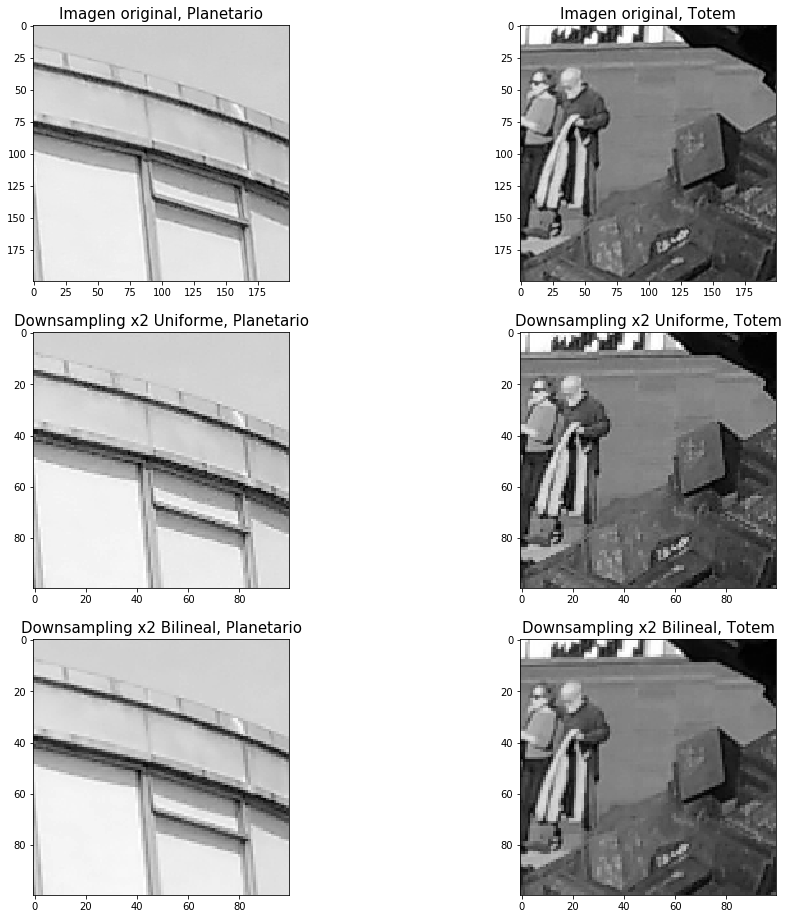

In [11]:
f, axarr = plt.subplots(3,2)
f.set_size_inches(16, 16)
axarr[0,0].imshow(img1[1800:2000,3000:3200], cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img2[2500:2700,1200:1400], cmap=plt.cm.gray)
axarr[0,1].set_title("Imagen original, Totem", fontsize=15)
axarr[1,0].imshow(img1_downsamp_uni[900:1000,1500:1600], cmap=plt.cm.gray)
axarr[1,0].set_title("Downsampling x2 Uniforme, Planetario", fontsize=15)
axarr[1,1].imshow(img2_downsamp_uni[1250:1350,600:700], cmap=plt.cm.gray)
axarr[1,1].set_title("Downsampling x2 Uniforme, Totem", fontsize=15)
axarr[2,0].imshow(img1_downsamp_bilin[900:1000,1500:1600], cmap=plt.cm.gray)
axarr[2,0].set_title("Downsampling x2 Bilineal, Planetario", fontsize=15)
axarr[2,1].imshow(img2_downsamp_bilin[1250:1350,600:700], cmap=plt.cm.gray)
axarr[2,1].set_title("Downsampling x2 Bilineal, Totem", fontsize=15)
axarr[2,0].imshow(img1_downsamp_bilin[900:1000,1500:1600], cmap=plt.cm.gray)
axarr[2,0].set_title("Downsampling x2 Bilineal, Planetario", fontsize=15)
axarr[2,1].imshow(img2_downsamp_bilin[1250:1350,600:700], cmap=plt.cm.gray)
axarr[2,1].set_title("Downsampling x2 Bilineal, Totem", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[0,0].grid(False)
axarr[1,1].grid(False)
plt.show()

# Upsampling

In [12]:
def upsampling(img, kernel, tipo, size):
    
    img_filt = np.zeros((int(img.shape[0]*2),int(img.shape[1]*2)))
    margenk = kernel.shape[0]
            
    if tipo == "uniforme":
        
        for i in range(0, np.shape(img)[0]):
            for j in range(0, np.shape(img)[1]):

                img_filt[i*2:(i*2+margenk),j*2:(j*2+margenk)] = img[i, j]

    if tipo == "bilineal":
        
        #mg_filt = np.zeros((int(img.shape[0]*2),int(img.shape[1]*2)))
        for i in range(0, np.shape(img)[0]):
                for j in range(0, np.shape(img)[1]):
                        img_filt[i*2,j*2] = img[i, j]

        img_filt[:,-1] = img_filt[:,-2]
        img_filt[-1,:] = img_filt[-2,:]

        for i in range(0,np.shape(img_filt)[0],2):
                for j in range(1, np.shape(img_filt)[1]-1,2):
                    img_filt[i,j] = img_filt[i,j-1]+0.5*(img_filt[i,j+1]-img_filt[i,j-1])

        for i in range(1,np.shape(img_filt)[0]-1,2):
                for j in range(0, np.shape(img_filt)[1],2):
                    img_filt[i,j] = img_filt[i-1,j]+0.5*(img_filt[i+1,j]-img_filt[i-1,j])  

        for i in range(1,np.shape(img_filt)[0]-1,2):
                for j in range(1, np.shape(img_filt)[1]-1,2):
                    img_filt[i,j] = np.mean([img_filt[int(i-1),int(j+1)],img_filt[int(i-1),int(j-1)],img_filt[int(i+1),int(j+1)],img_filt[int(i+1),int(j-1)]]) 
    

    return img_filt

In [13]:
img1_upsamp_uni = upsampling(img1, np.ones((2,2)), "uniforme", 2)
img2_upsamp_uni = upsampling(img2, np.ones((2,2)), "uniforme", 2)

In [14]:
img1_ups_bilin = upsampling(img1, np.ones((2,2)), "bilineal", 2)
img2_ups_bilin = upsampling(img2, np.ones((2,2)), "bilineal", 2)

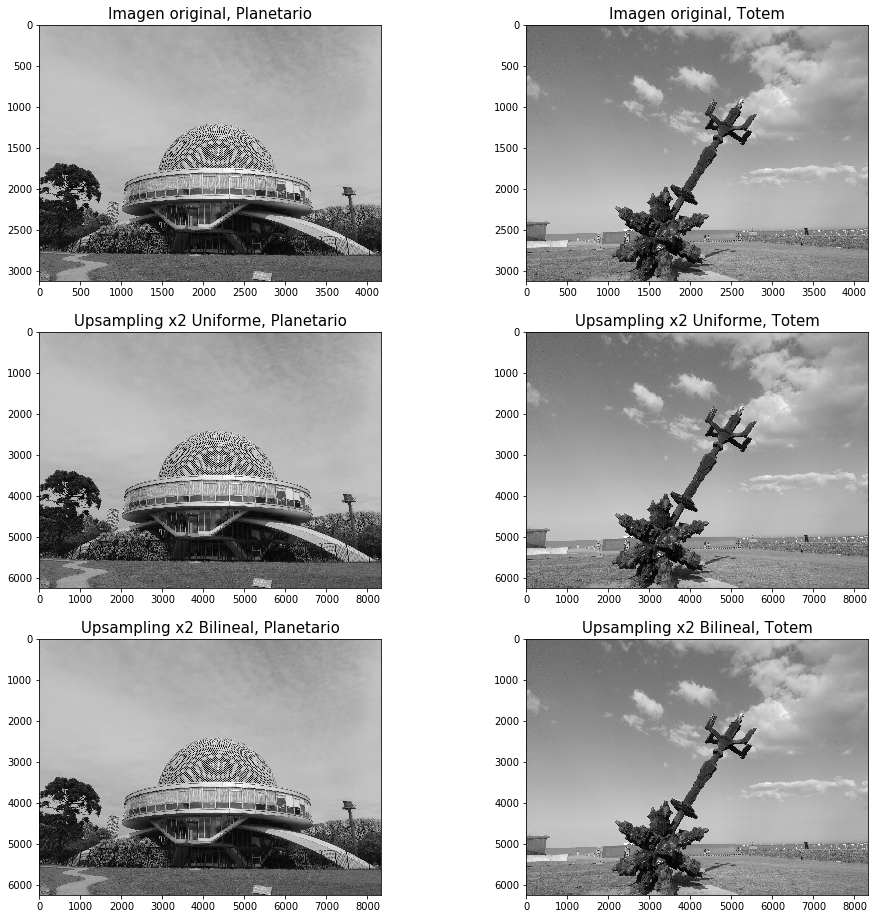

In [15]:
f, axarr = plt.subplots(3,2)
f.set_size_inches(16, 16)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img2, cmap=plt.cm.gray)
axarr[0,1].set_title("Imagen original, Totem", fontsize=15)
axarr[1,0].imshow(img1_upsamp_uni, cmap=plt.cm.gray)
axarr[1,0].set_title("Upsampling x2 Uniforme, Planetario", fontsize=15)
axarr[1,1].imshow(img2_upsamp_uni, cmap=plt.cm.gray)
axarr[1,1].set_title("Upsampling x2 Uniforme, Totem", fontsize=15)
axarr[2,0].imshow(img1_ups_bilin, cmap=plt.cm.gray)
axarr[2,0].set_title("Upsampling x2 Bilineal, Planetario", fontsize=15)
axarr[2,1].imshow(img2_ups_bilin, cmap=plt.cm.gray)
axarr[2,1].set_title("Upsampling x2 Bilineal, Totem", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[0,0].grid(False)
axarr[1,1].grid(False)
plt.show()

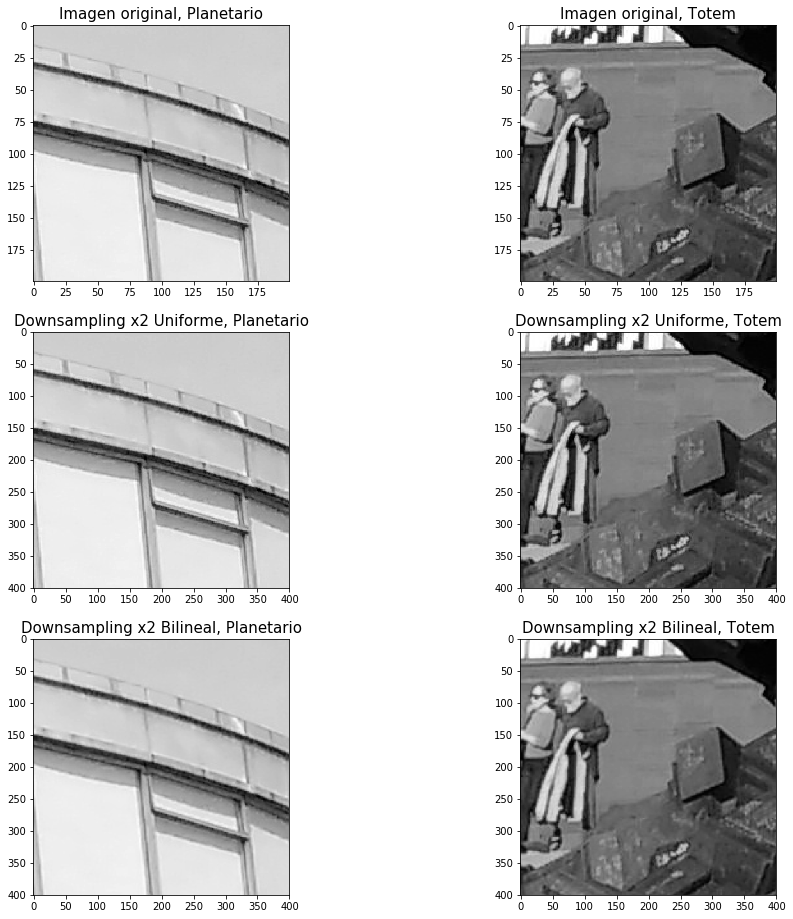

In [16]:
f, axarr = plt.subplots(3,2)
f.set_size_inches(16, 16)
axarr[0,0].imshow(img1[1800:2000,3000:3200], cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img2[2500:2700,1200:1400], cmap=plt.cm.gray)
axarr[0,1].set_title("Imagen original, Totem", fontsize=15)
axarr[1,0].imshow(img1_upsamp_uni[3600:4000,6000:6400], cmap=plt.cm.gray)
axarr[1,0].set_title("Downsampling x2 Uniforme, Planetario", fontsize=15)
axarr[1,1].imshow(img2_upsamp_uni[5000:5400,2400:2800], cmap=plt.cm.gray)
axarr[1,1].set_title("Downsampling x2 Uniforme, Totem", fontsize=15)
axarr[2,0].imshow(img1_ups_bilin[3600:4000,6000:6400], cmap=plt.cm.gray)
axarr[2,0].set_title("Downsampling x2 Bilineal, Planetario", fontsize=15)
axarr[2,1].imshow(img2_ups_bilin[5000:5400,2400:2800], cmap=plt.cm.gray)
axarr[2,1].set_title("Downsampling x2 Bilineal, Totem", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[0,0].grid(False)
axarr[1,1].grid(False)
plt.show()

# Cuantizacion

In [97]:
def cuantizacion(img, n, tipo):
    
    img_filt = np.zeros((int(img.shape[0]),int(img.shape[1])))   
    vals = np.linspace(0,1,n)
    

    if tipo == "uniforme":
        
        for i in range(0, np.shape(img)[0]):
            for j in range(0, np.shape(img)[1]):
                
                dif_vals = np.zeros(n)
                
                for t in range(0,n):
                    dif_vals[t] = (vals[t]-img[i,j])**2
                    
                img_filt[i,j] = vals[np.argmin(dif_vals)]
                
    if tipo == "dithering_rand":

        for i in range(0, np.shape(img)[0]):
            for j in range(0, np.shape(img)[1]):
        
                dif_vals = np.zeros(n)
                
                for t in range(0,n):
                    dif_vals[t] = (vals[t]-img[i,j])**2
                
                dif_min = np.min(dif_vals)
                val_min = vals[np.argmin(dif_vals)]
                
                dif_2min = np.min(dif_vals[(dif_vals != np.min(dif_vals))])
                val_2min = vals[dif_vals == dif_2min]
                
                dif_porc = np.absolute(dif_min-val_min)/np.absolute(val_min - val_2min)
                
                if np.random.rand() > (1 - dif_porc):
                    img_filt[i,j] = val_min
                else:
                    img_filt[i,j] = val_2min
                    
    if tipo == "scan_line":                    
        for i in range(0, np.shape(img)[0]):            
            loss = 0            
            for j in range(0, np.shape(img)[1]):
                img_filt[i,j] = vals[np.argmin((vals-img[i,j]+loss)**2)]
                loss = loss + (img_filt[i,j]-img[i,j])
                                    
    return img_filt

### Cuantizacion: Uniforme

In [22]:
img1_cuant_uni_2 = cuantizacion(img1,2, "uniforme")
img1_cuant_uni_4 = cuantizacion(img1,4, "uniforme")
img1_cuant_uni_8 = cuantizacion(img1,8, "uniforme")

img2_cuant_uni_2 = cuantizacion(img2,2, "uniforme")
img2_cuant_uni_4 = cuantizacion(img2,4, "uniforme")
img2_cuant_uni_8 = cuantizacion(img2,8, "uniforme")

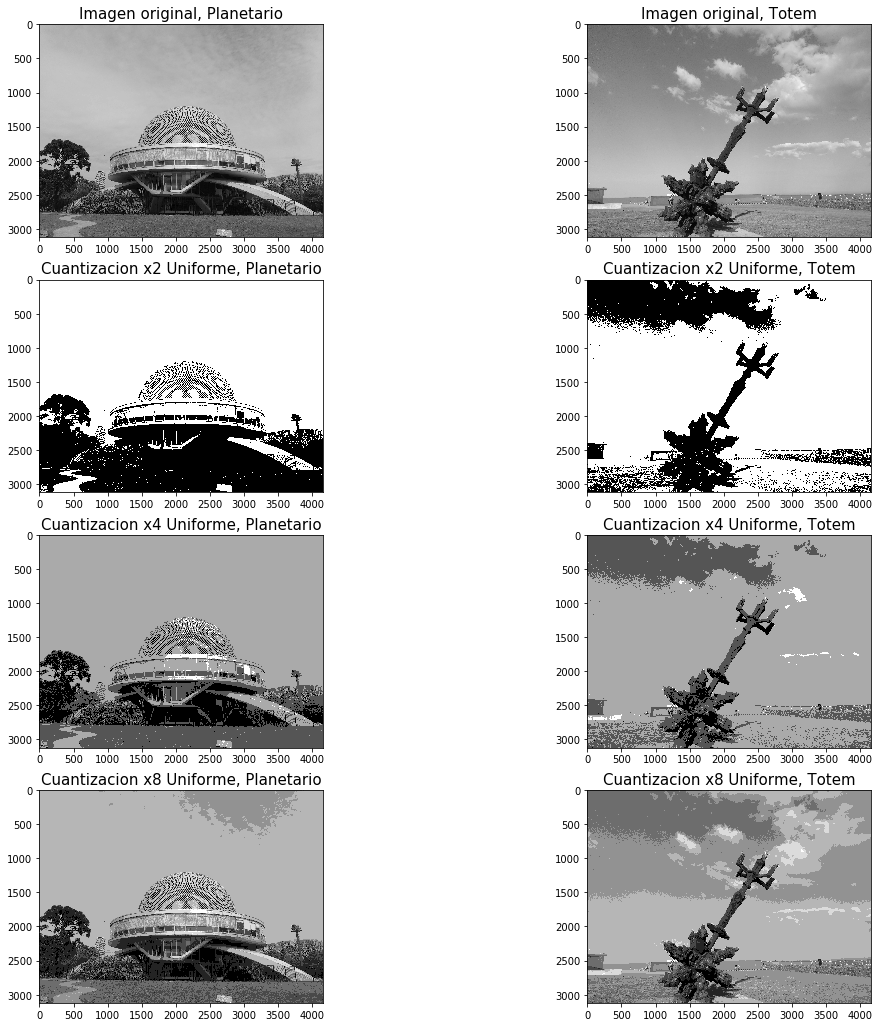

In [27]:
f, axarr = plt.subplots(4,2)
f.set_size_inches(18, 18)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img2, cmap=plt.cm.gray)
axarr[0,1].set_title("Imagen original, Totem", fontsize=15)

axarr[1,0].imshow(img1_cuant_uni_2, cmap=plt.cm.gray)
axarr[1,0].set_title("Cuantizacion x2 Uniforme, Planetario", fontsize=15)
axarr[1,1].imshow(img2_cuant_uni_2, cmap=plt.cm.gray)
axarr[1,1].set_title("Cuantizacion x2 Uniforme, Totem", fontsize=15)

axarr[2,0].imshow(img1_cuant_uni_4, cmap=plt.cm.gray)
axarr[2,0].set_title("Cuantizacion x4 Uniforme, Planetario", fontsize=15)
axarr[2,1].imshow(img2_cuant_uni_4, cmap=plt.cm.gray)
axarr[2,1].set_title("Cuantizacion x4 Uniforme, Totem", fontsize=15)

axarr[3,0].imshow(img1_cuant_uni_8, cmap=plt.cm.gray)
axarr[3,0].set_title("Cuantizacion x8 Uniforme, Planetario", fontsize=15)
axarr[3,1].imshow(img2_cuant_uni_8, cmap=plt.cm.gray)
axarr[3,1].set_title("Cuantizacion x8 Uniforme, Totem", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[0,0].grid(False)
axarr[1,1].grid(False)
plt.show()

### Cuantizacion: Dithering Random

In [93]:
img1_cuant_dith_4 = cuantizacion(img1,4, "dithering_rand")
img1_cuant_dith_8 = cuantizacion(img1,8, "dithering_rand")

img2_cuant_dith_4 = cuantizacion(img2,4, "dithering_rand")
img2_cuant_dith_8 = cuantizacion(img2,8, "dithering_rand")

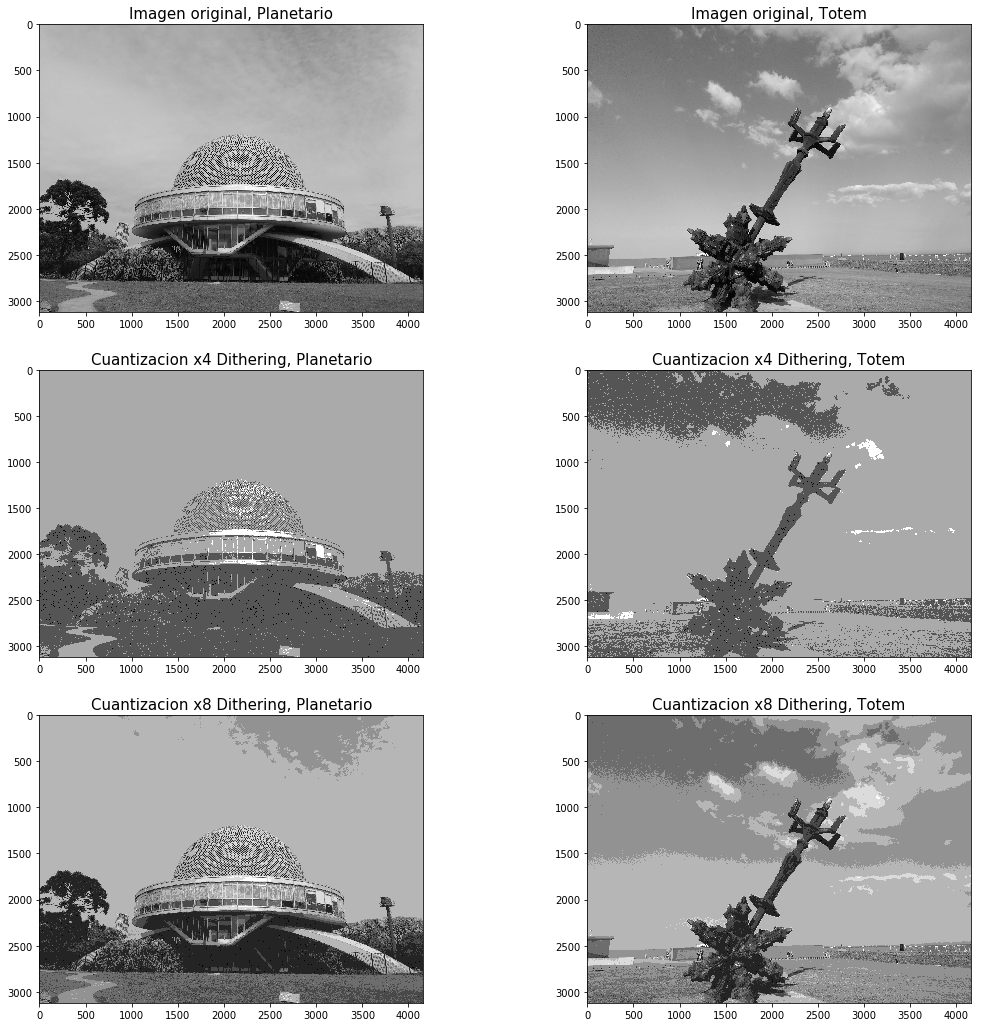

In [96]:
f, axarr = plt.subplots(3,2)
f.set_size_inches(18, 18)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img2, cmap=plt.cm.gray)
axarr[0,1].set_title("Imagen original, Totem", fontsize=15)

axarr[1,0].imshow(img1_cuant_dith_4, cmap=plt.cm.gray)
axarr[1,0].set_title("Cuantizacion x4 Dithering, Planetario", fontsize=15)
axarr[1,1].imshow(img2_cuant_dith_4, cmap=plt.cm.gray)
axarr[1,1].set_title("Cuantizacion x4 Dithering, Totem", fontsize=15)

axarr[2,0].imshow(img1_cuant_dith_8, cmap=plt.cm.gray)
axarr[2,0].set_title("Cuantizacion x8 Dithering, Planetario", fontsize=15)
axarr[2,1].imshow(img2_cuant_dith_8, cmap=plt.cm.gray)
axarr[2,1].set_title("Cuantizacion x8 Dithering, Totem", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[0,0].grid(False)
axarr[1,1].grid(False)
plt.show()

### Cuantizacion: Scan Line

In [103]:
img1_cuant_scanline_4 = cuantizacion(img1,4, "scan_line")
img1_cuant_scanline_8 = cuantizacion(img1,8, "scan_line")
img1_cuant_scanline_12 = cuantizacion(img1,12, "scan_line")

img2_cuant_scanline_4 = cuantizacion(img2,4, "scan_line")
img2_cuant_scanline_8 = cuantizacion(img2,8, "scan_line")
img2_cuant_scanline_12 = cuantizacion(img2,12, "scan_line")

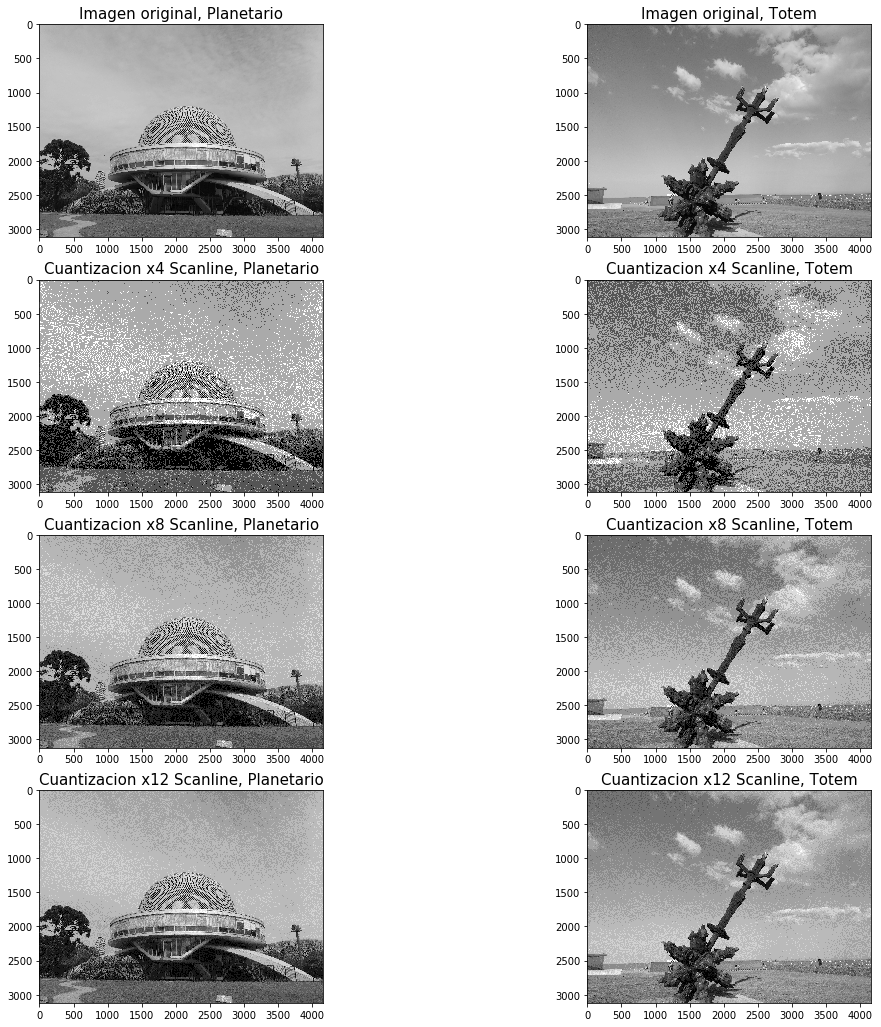

In [105]:
f, axarr = plt.subplots(4,2)
f.set_size_inches(18, 18)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img2, cmap=plt.cm.gray)
axarr[0,1].set_title("Imagen original, Totem", fontsize=15)

axarr[1,0].imshow(img1_cuant_scanline_4, cmap=plt.cm.gray)
axarr[1,0].set_title("Cuantizacion x4 Scanline, Planetario", fontsize=15)
axarr[1,1].imshow(img2_cuant_scanline_4, cmap=plt.cm.gray)
axarr[1,1].set_title("Cuantizacion x4 Scanline, Totem", fontsize=15)

axarr[2,0].imshow(img1_cuant_scanline_8, cmap=plt.cm.gray)
axarr[2,0].set_title("Cuantizacion x8 Scanline, Planetario", fontsize=15)
axarr[2,1].imshow(img2_cuant_scanline_8, cmap=plt.cm.gray)
axarr[2,1].set_title("Cuantizacion x8 Scanline, Totem", fontsize=15)

axarr[3,0].imshow(img1_cuant_scanline_12, cmap=plt.cm.gray)
axarr[3,0].set_title("Cuantizacion x12 Scanline, Planetario", fontsize=15)
axarr[3,1].imshow(img2_cuant_scanline_12, cmap=plt.cm.gray)
axarr[3,1].set_title("Cuantizacion x12 Scanline, Totem", fontsize=15)

axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[0,0].grid(False)
axarr[1,1].grid(False)
plt.show()